<h1>Regresión logística</h1>

La regresión logística es un modelo estadístico utilizado para analizar y predecir variables categóricas binarias, es decir, variables que pueden tener dos valores posibles, como sí/no, verdadero/falso, 0/1, etc. Se diferencia de la regresión lineal, que se utiliza para predecir variables numéricas continuas.

La regresión logística es ampliamente utilizada en aplicaciones del mundo real, como la predicción de la probabilidad de que un cliente compre un producto, la detección de enfermedades, la clasificación de correos electrónicos como spam o no spam, y muchas otras aplicaciones de clasificación binaria. 

<h2>Contexto</h2>

La Organización Mundial de la Salud (OMS) ha estimado que ocurren 12 millones de muertes en todo el mundo cada año debido a enfermedades cardíacas. La mitad de estas muertes en los Estados Unidos y otros países desarrollados se deben a enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones relacionadas con cambios en el estilo de vida en pacientes de alto riesgo y, como consecuencia, reducir las complicaciones.

Este dato subraya la importancia crítica de abordar las enfermedades del corazón, ya que representan una carga significativa para la salud global. La detección temprana y la gestión adecuada de los factores de riesgo cardiovascular son fundamentales para prevenir el desarrollo y la progresión de estas enfermedades. Al proporcionar a los pacientes una evaluación precisa de su riesgo cardiovascular, los profesionales de la salud pueden trabajar junto con los individuos para implementar estrategias de prevención, como cambios en la dieta, aumento de la actividad física y, en algunos casos, medicamentos, con el objetivo de reducir la incidencia de enfermedades cardíacas y, en última instancia, salvar vidas. La concienciación sobre la importancia de un estilo de vida saludable y la prevención de enfermedades cardíacas es esencial, ya que puede tener un impacto significativo en la salud de las personas y en la carga económica asociada con el tratamiento de estas afecciones.

En el contexto de las enfermedades cardíacas, el uso de análisis de datos desempeña un papel crucial en varias áreas para abordar este problema de salud pública. La analítica de datos se utiliza para desarrollar modelos de predicción que evalúan el riesgo individual de una persona de desarrollar enfermedades cardíacas. Esto implica el análisis de factores de riesgo, como la edad, el género, la presión arterial, el colesterol, el historial familiar y otros indicadores de salud. Estos modelos pueden ayudar a identificar a las personas en mayor riesgo y permitir intervenciones preventivas tempranas.

<h2>Los datos</h2>

Vamos a desarrollar un modelo de regresión logistica utilizando un conjunto de datos que proviene de un estudio cardiovascular en los residentes de la ciudad de Framingham, Massachusetts, Estados Unidos. El objetivo de la clasificación es predecir si el paciente tiene un riesgo de enfermedad coronaria (CHD) a 10 años en el futuro. El conjunto de datos contiene información de los pacientes, con más de 4,000 registros y 15 atributos.

<h2>Código en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Luego cargamos el conjunto de datos y vemos las primeras filas y columnas del conjunto de datos. Los datos esta disponible en <a href='https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression'>Kaggle</a> o se puedes descargar directamente desde el repositorio en <a href='https://raw.githubusercontent.com/victormlgh/ModelajePredictivoOptimizacion/master/Semana3/framingham.csv'>Github</a>, como hacemos en el codigo.

In [15]:
data_url = 'framingham.csv'
df = pd.read_csv(data_url)
print(df.shape)
df.head()

(4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Es importante señalar que, según la descripción, las variables en este conjunto de datos son numéricas y ya están categorizadas. Esto sugiere que las variables independientes en el conjunto de datos son de naturaleza cuantitativa y que es posible que ya se hayan preprocesado o codificado previamente para su uso en análisis. Esta categorización previa puede ser útil para simplificar el análisis y la modelización, ya que las variables categóricas suelen requerir un proceso adicional de codificación o transformación para ser utilizadas en una regresión logística.

In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Las variables presentes en el conjunto de datos estan divididas en Demográficas, Conductual, Historia Médica, Médicas Actuales, Variable a predecir

Demográficas:
<ul>
<li>male: Categórico, con dos valores posibles: masculino (1) o femenino (0).</li>
<li>age: Cuantitativa, representa la edad del paciente.</li>
<li>education: Categórico, con cuatro valores que marcan el nivel de educación de la personas</li>
</ul>

Conductual:
<ul>
<li>currentSmoker: Categórico, indica si el paciente es fumador actual: Si (1), No (0).</li>
<li>cigsPerDay: Cuantitativa, representa la cantidad promedio de cigarrillos que la persona fuma en un día</li>
</ul>

Historia Médica:
<ul>
<li>BPMeds: Categórico, indica si el paciente estaba tomando medicamentos para la presión arterial: Si (1), No (0).</li>
<li>prevalentStroke: Categórico, señala si el paciente ha tenido un accidente cerebrovascular anteriormente: Si (1), No (0).</li>
<li>prevalentHyp: Categórico, indica si el paciente era hipertenso: Si (1), No (0).</li>
<li>diabetes: Categórico, indica si el paciente tenía diabetes: Si (1), No (0).</li>
</ul>

Médicas Actuales:
<ul>
<li>totChol: Cuantitativa, representa el nivel de colesterol total.</li>
<li>sysBP: Cuantitativa, representa la presión arterial sistólica.</li>
<li>diaBP: Cuantitativa, representa la presión arterial diastólica.</li>
<li> BMI: Cuantitativa, representa el índice de masa corporal.</li>
<li>heartRate: Cuantitativa, representa el ritmo cardíaco.</li>
<li>glucose: Cuantitativa, representa el nivel de glucosa (Continua).</li>
</ul>

Variable a predecir (objetivo deseado):
<ul>
<li>TenYearCHD: Categórica binaria,  Indica si el paciente tiene un riesgo de enfermedad coronaria en los próximos 10 años: Si (1), No (0).</li>
</ul>

Es importante buscar valores faltantes en el conjunto de datos antes de realizar cualquier análisis o modelización, ya que los valores faltantes pueden afectar significativamente los resultados y la interpretación de los datos. 

In [16]:
intial_observations = df.shape[0]
df.dropna(axis=0, inplace=True)
final_observations = df.shape[0]
print('Iniciamos con {} observaciones y terminamos con {}, para un reducción de un {:.2f}%'.format(intial_observations,final_observations,(1-final_observations/intial_observations)*100))

Iniciamos con 4238 observaciones y terminamos con 3656, para un reducción de un 13.73%


<h2>Exploración de los datos</h2>

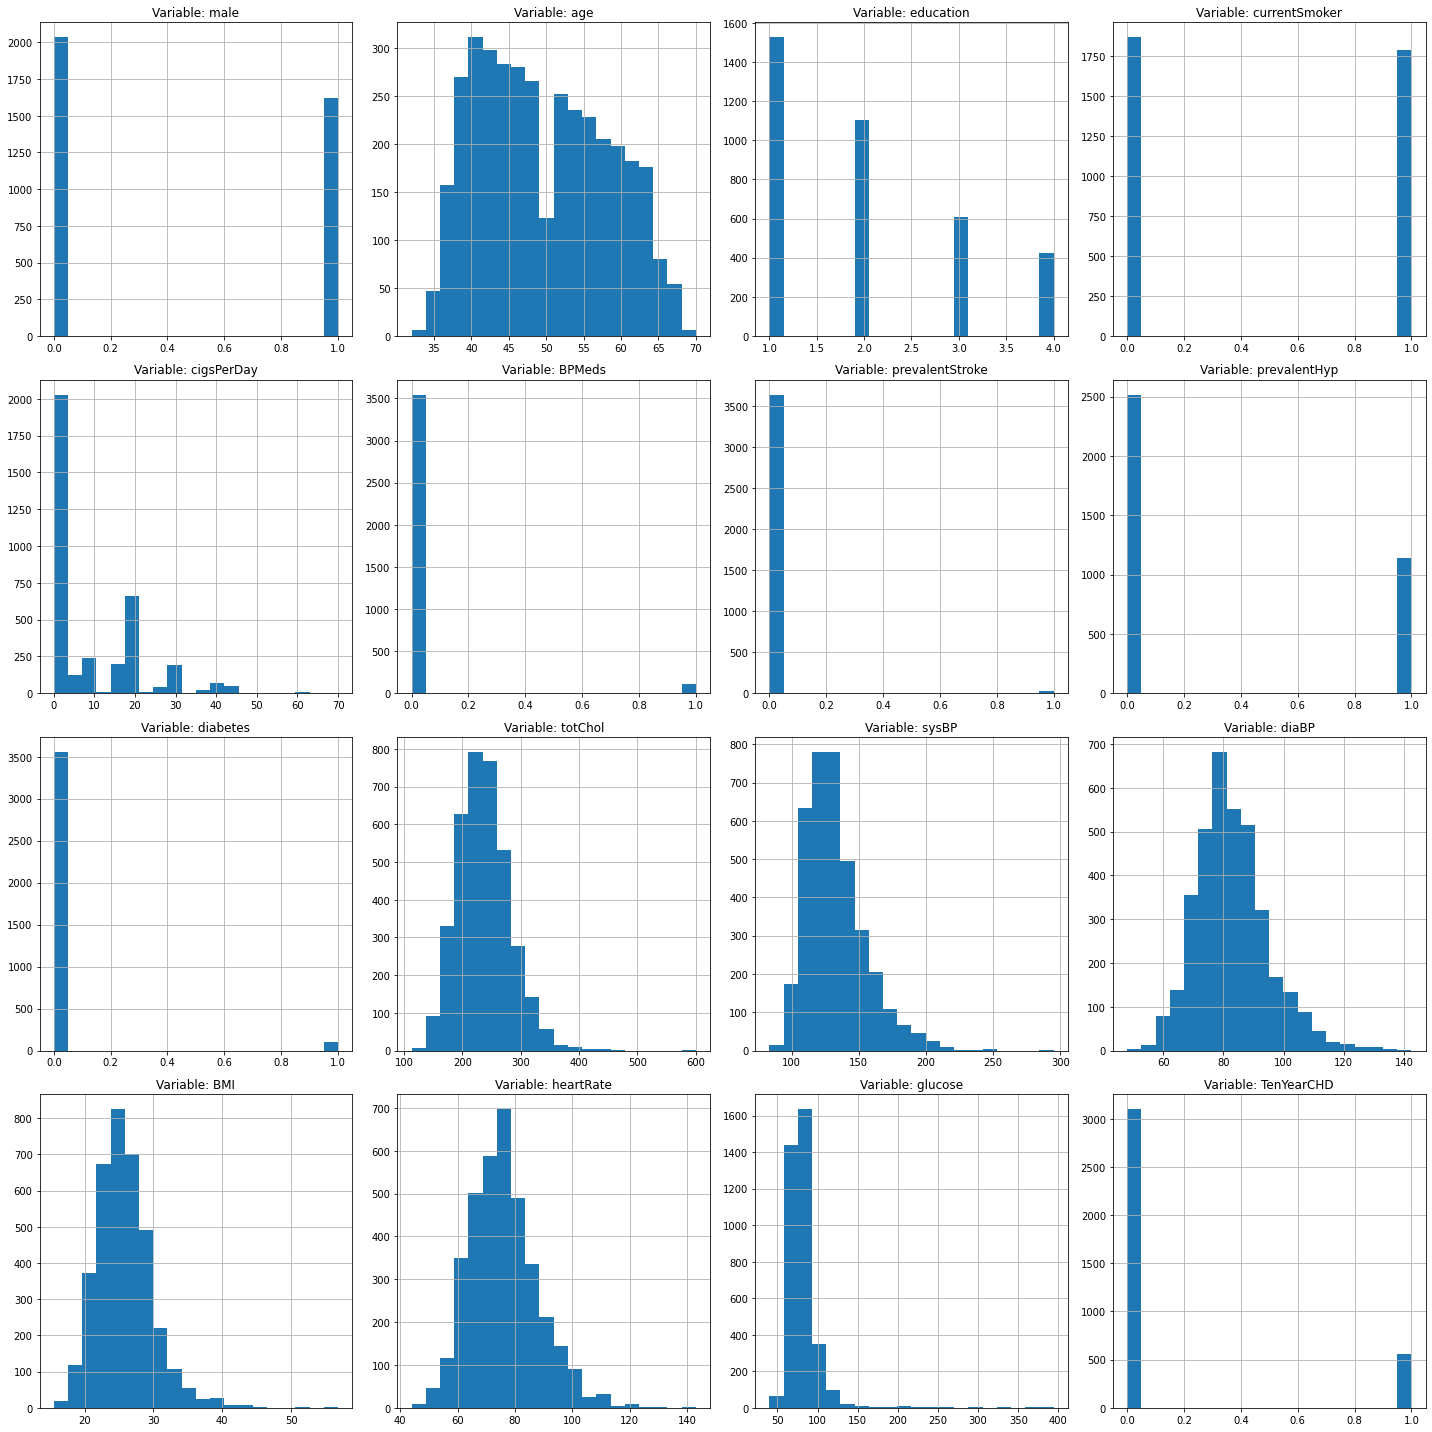

In [25]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title("Variable: "+feature)
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,4,4)

Utilizamos los histogramas para representan la distribución de las variable, el objetivo es ver cómo se distribuyen los valores y si hay algún pico, sesgo o dispersión notable.

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

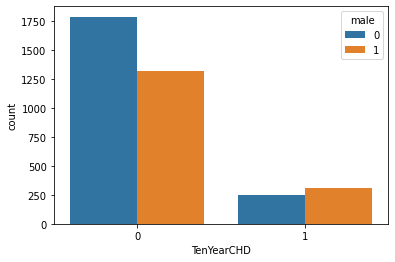

In [30]:
sns.countplot(x='TenYearCHD',data=df, hue='male')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

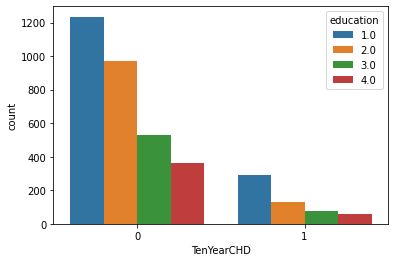

In [32]:
sns.countplot(x='TenYearCHD',data=df, hue='education')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

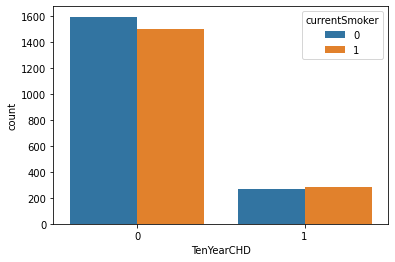

In [33]:
sns.countplot(x='TenYearCHD',data=df, hue='currentSmoker')

Es importante observar la cantidad de pacientes positivos en tu conjunto de datos, especialmente si estás trabajando en un problema de clasificación binaria como en este caso, donde se intenta predecir si un paciente tiene un riesgo de enfermedad coronaria (CHD) a 10 años. De los datos podemos observar un total de 3,179 pacientes que no tienen enfermedad cardíaca y 572 pacientes con riesgo de enfermedad cardíaca. En las graficas anteriores podemos ver su distibución por sexo, educación y si es fumador.

<h2>Entrenamiento del modelo</h2>

Los datos originales los separamos de forma aleatoria, donde el 75% de los datos los vamos a utilizar para entrenar el modelo y el resto para probar la eficiencia del modelo.

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD',axis=1) # Independet variable
y = df['TenYearCHD'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(2742,) (2742, 15)
(914,) (914, 15)


Podmeos observar que para el entrenamiento tenemos 2,742 observaciones y 914 observaciones para las pruebas.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.intercept_, log_reg.coef_)

[-0.42921627] [[ 5.32821418e-01  2.49470619e-02 -2.41775499e-01 -2.87153734e-01
   1.59029965e-02  2.04912492e-01  8.01510527e-02  1.05027749e+00
   1.82605434e-01 -5.13380476e-05  1.12386161e-02 -2.62822802e-02
  -4.99419073e-02 -1.69433909e-02  5.95679158e-03]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
y_pred_ml = log_reg.predict(X_test)

J_mse_sk = mean_squared_error(y_pred_ml, y_test)

# R_square
R_square_ml = log_reg.score(X_test,y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_ml)

El valor de MSE es:  0.15426695842450766
El R^2 obtenido por scikit learn es : 0.8457330415754923


Utilizando el valor de R^2 podemos apreciar que el modelo explica el 84.57% de las variaciones.

Text(0.5, 1.0, 'Verificar normalidad en los residuos')

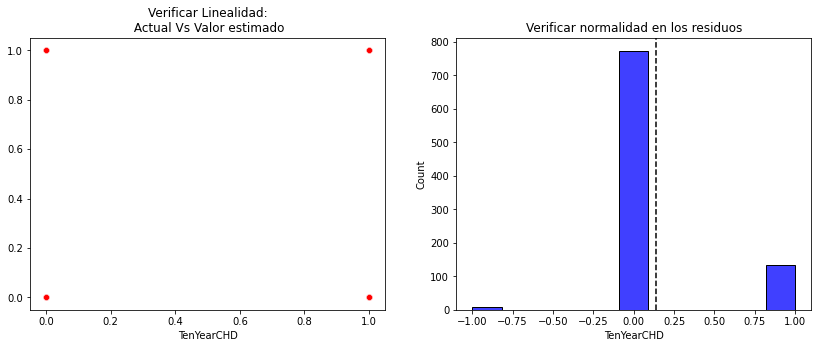

In [39]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_ml,ax=ax,color='r')
ax.set_title('Verificar Linealidad:\n Actual Vs Valor estimado')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_ml),ax=ax,color='b')
ax.axvline((y_test - y_pred_ml).mean(),color='k',linestyle='--')
ax.set_title('Verificar normalidad en los residuos')

<h2>Próximos pasos</h2>

<ul>
<li>¿Qué acciones podemos tomar para mejorar el modelo de predicción?</li>
<li>¿Cómo tomador de decisiones, que recomendaciones puedes dar con la información que te da el modelo?</li></ul>